### 경희대학교 산업경영공학과 2015100915 김태호

# 경희대학교 공과대학 시간표 분석

BeautifulSoup와 urllib, selenium을 사용하여 수강목록의 데이터가 있는  '에브리타임'에서 데이터를 가져와서 분석해본다.

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)
from selenium import webdriver
import urllib.request
import urllib.parse
import time
import re #정규식

### 자동으로 공대 강좌목록 가져오기

In [2]:
url = 'https://everytime.kr/timetable'
driver = webdriver.Chrome('../driver/chromedriver.exe')
driver.get(url)
time.sleep(3)
user_id = input('에브리타임 아이디를 입력해주세요.: ')
et_login = driver.find_element_by_name("userid")
et_login.clear()
et_login.send_keys(user_id)

user_pw = input('에브리타임 비밀번호를 입력해주세요.: ')
et_login = driver.find_element_by_name("password")
et_login.clear()
et_login.send_keys(user_pw) #자신의 비번을 넣으세요

driver.find_element_by_xpath("""//*[@id="container"]/form/p[3]/input""").click()
time.sleep(3)
while True:
    try:
        driver.find_element_by_xpath("""//*[@id="sheet"]/ul/li[3]/a""").click()
        time.sleep(2)
        break
    except:
        continue
timetable_all = pd.DataFrame()
timetable_all
graph = {}
while True:
    try:
        driver.find_element_by_xpath("""//*[@id="container"]/ul/li[1]""").click()
        time.sleep(2)
        break
    except:
        continue
for i in range(9):
    while True:
        try:
            driver.find_element_by_xpath("""//*[@id="subjects"]/div[1]/a[4]""").click()
            time.sleep(2)
            break
        except:
            continue
    while i == 0:
        try:
            driver.find_element_by_xpath("""//*[@id="subjectCategoryFilter"]/div/ul/li[2]""").click()
            time.sleep(2)
            break
        except:
            continue
    while True:
        try:
            driver.find_element_by_xpath("""//*[@id="subjectCategoryFilter"]/div/ul/ul[2]/li["""+str((i+1))+"""]""").click()
            time.sleep(2)
            break
        except:
            continue
#     while True:
#         try:
#             driver.find_element_by_xpath("""//*[@id="subjectCategoryFilter"]/div/ul/ul[2]/ul["""+str((i+1))+"""]/li""").click()
#             time.sleep(2)
#             break
#         except:
#             continue
    page = driver.page_source
    soup = BeautifulSoup(page, "html.parser")
    contents = []
    tmp = soup.find('div','list').find('tbody').find_all('td')
    for i in tmp:
        tmp = i.get_text()
        contents.append(tmp)
    contents = np.array(contents)
    column = []
    tmp = tmp = soup.find('div','list').find('thead').find_all('th')
    for i in tmp:
        tmp = str(i).lstrip('<th>').split('<div>')
        column.append(tmp[0])
    timetable = pd.DataFrame(contents.reshape(len(contents)//12,12), columns=column)
    del(timetable['계획서']) ;del(timetable['강의평'])
    major = soup.find('a','item active').get_text().split(':')[1]
    graph[str(major)] = len(timetable)
    timetable_all = pd.concat([timetable_all,timetable],ignore_index=True)
    timetable.to_excel('../data/19년 1학기 '+major+' 강좌.xls',encoding = 'utf8',sheet_name=major,index = False) # 학과 별로 저장
timetable_all.to_excel('../data/19년 1학기 공과대학 강좌.xls',encoding = 'utf8',sheet_name=major,index = False) # 공대 전체 데이터 저장
time.sleep(2)
driver.close()

에브리타임 아이디를 입력해주세요.: xoghsms
에브리타임 비밀번호를 입력해주세요.: B586092


### 저장된 데이터 확인

In [4]:
timetable = pd.read_excel('../data/19년 1학기 산업경영공학과 강좌.xls', encoding = 'utf8') 
timetable.head()

,대상학년,강좌코드,강좌명,교수명,학점,강의시간/강의실,이수구분,담은 인원,정원,특이사항
0,2,IE201-00,경제성공학,김장호,3,화 10:30-11:45 (공148)목 10:30-11:45 (공148),전공선택(05),79,0,영어
1,4,IE414-00,금융공학,김장호,3,화 13:30-14:45 (공148)목 13:30-14:45 (공148),전공선택(05),68,0,영어
2,4,IE411-00,연구연수활동1(산업경영공학),반상우,1,금 - (공367),전공선택(05),0,0,"수강신청기간에 본인이 직접 수강신청 하여야 하며, 신청서는 학과사무실로 3월 6일까..."
3,3,IE308-00,인간공학,반상우,3,월 15:00-16:15 (공367)수 15:00-16:15 (공367),전공선택(05),80,0,영어(부분)
4,4,IE423-03,창의적종합설계1(산업경영공학),반상우,3,월 16:30-19:15 (공522호),전공필수(04),21,0,NaN


In [5]:
timetable_all = pd.read_excel('../data/19년 1학기 공과대학 강좌.xls',encoding = 'utf8') 
timetable_all.head()

,대상학년,강좌코드,강좌명,교수명,학점,강의시간/강의실,이수구분,담은 인원,정원,특이사항
0,2.0,NE201-00,원자및핵물리,김광표,3,월 09:00-10:15 (공365)수 09:00-10:15 (공365),전공필수(04),40,0,"영어(부분), 2018 경희 Fellow(교육) 선정자"
1,3.0,NE311-00,원자로이론I,김명현,3,월 10:30-11:45 (공365)수 10:30-11:45 (공365),전공필수(04),61,0,영어
2,4.0,NE412-00,노심안전공학,김명현,3,화 10:30-11:45 (공206)목 10:30-11:45 (공206),전공선택(05),36,0,영어
3,2.0,NE203-00,핵공학개론I,김형대,3,화 15:00-16:15 (공365호)목 15:00-16:15 (공365호),전공필수(04),51,0,영어(부분)
4,4.0,NE413-00,로심설계,주형국,3,화 16:30-18:20 (공206)목 16:30-18:20 (공206),전공선택(05),10,0,"영어, 화,목요일 16:30 ~ 18:20 / 공272"


## 학과별 전공과목 수 비교

In [9]:
maj = list(graph.keys())
num = list(graph.values())
graph_df = {'major':maj, 'num':num}
graph_df = pd.DataFrame(graph_df)
graph_df = graph_df.set_index('major')
graph_df.sort_values(by=['num'], axis=0, ascending=False)

,num
major,
기계공학과,50
건축학과,42
화학공학과,38
정보전자신소재공학과,33
건축공학과,30
사회기반시스템공학과,26
원자력공학과,25
산업경영공학과,24
환경학및환경공학과,21


### 그래프

Text(0.5, 0, 'num')

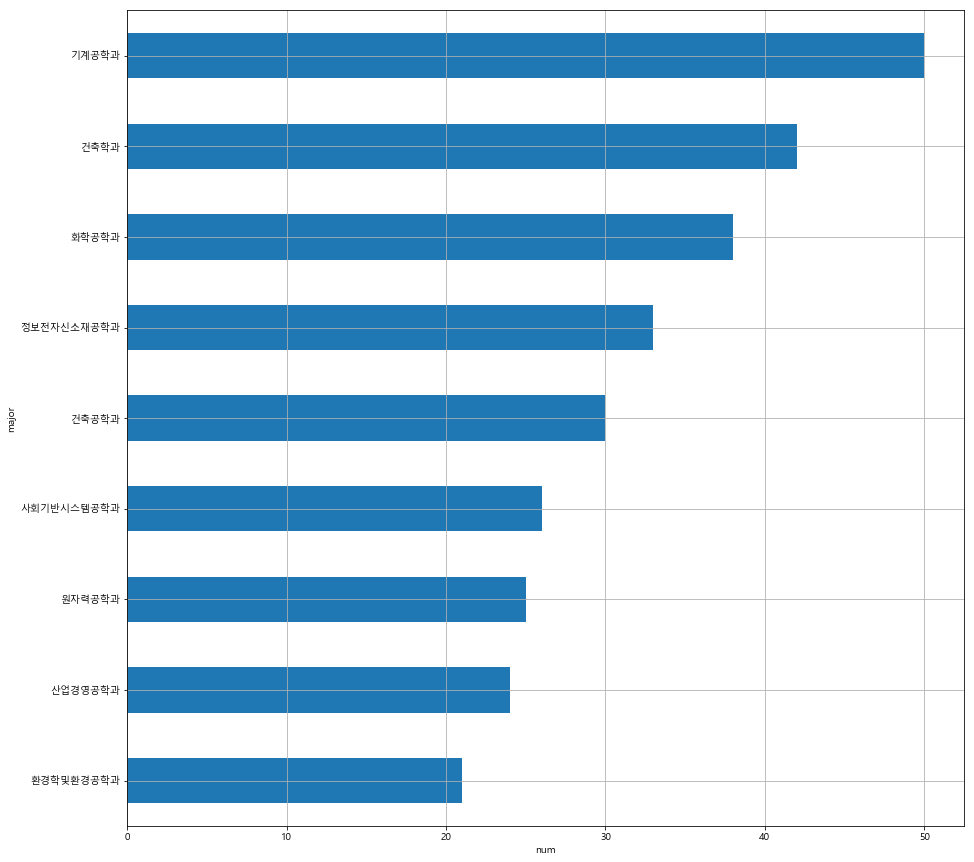

In [7]:
plt.figure()
graph_df.sort_values(by=['num'])['num'].plot(kind='barh', grid=True, figsize=(15,15))
plt.xlabel('num')

***산업경영공학과는 학생 수 도 많은데 열린 과목 수는 뒤에서 두 번째라 충격적이었다***